<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#4.1　分类变量" data-toc-modified-id="4.1　分类变量-1">4.1　分类变量</a></span><ul class="toc-item"><li><span><a href="#4.1.1　One-Hot编码（虚拟变量）" data-toc-modified-id="4.1.1　One-Hot编码（虚拟变量）-1.1">4.1.1　One-Hot编码（虚拟变量）</a></span></li><li><span><a href="#4.1.2　数字可以编码分类变量" data-toc-modified-id="4.1.2　数字可以编码分类变量-1.2">4.1.2　数字可以编码分类变量</a></span></li></ul></li><li><span><a href="#4.2　分箱、离散化、线性模型与树" data-toc-modified-id="4.2　分箱、离散化、线性模型与树-2">4.2　分箱、离散化、线性模型与树</a></span></li><li><span><a href="#4.3　交互特征与多项式特征" data-toc-modified-id="4.3　交互特征与多项式特征-3">4.3　交互特征与多项式特征</a></span></li><li><span><a href="#4.4　单变量非线性变换" data-toc-modified-id="4.4　单变量非线性变换-4">4.4　单变量非线性变换</a></span></li><li><span><a href="#4.5　自动化特征选择" data-toc-modified-id="4.5　自动化特征选择-5">4.5　自动化特征选择</a></span><ul class="toc-item"><li><span><a href="#4.5.1　单变量统计" data-toc-modified-id="4.5.1　单变量统计-5.1">4.5.1　单变量统计</a></span></li><li><span><a href="#4.5.2　基于模型的特征选择" data-toc-modified-id="4.5.2　基于模型的特征选择-5.2">4.5.2　基于模型的特征选择</a></span></li><li><span><a href="#4.5.3　迭代特征选择" data-toc-modified-id="4.5.3　迭代特征选择-5.3">4.5.3　迭代特征选择</a></span></li></ul></li><li><span><a href="#4.6　利用专家知识" data-toc-modified-id="4.6　利用专家知识-6">4.6　利用专家知识</a></span></li></ul></div>

# 第4章 数据表示和特征工程

对于某个特定应用来说，如何找到最佳数据表示，这个问题被称为特征工程（feature 
engineering），它是数据科学家和机器学习从业者在尝试解决现实世界问题时的主要任务之
一。用正确的方式表示数据，对监督模型性能的影响比所选择的精确参数还要大。

In [2]:
import numpy as np 
import pandas as pd 

## 4.1　分类变量

### 4.1.1　One-Hot编码（虚拟变量）

到目前为止，表示分类变量最常用的方法就是使用 one-hot 编码（one-hot-encoding）或
N 取一编码（one-out-of-N encoding），也叫虚拟变量（dummy variable）。

> 将输出变量或输出变量的一些导出属性包含在特征表
示中，这是构建监督机器学习模型时一个非常常见的错误。

> 我们使用的 one-hot 编码与统计学中使用的虚拟编码（dummy encoding）非
常相似，但并不完全相同。为简单起见，我们将每个类别编码为不同的二元
特征。在统计学中，通常将具有 k 个可能取值的分类特征编码为 k-1 个特征
（都等于零表示最后一个可能取值）。这么做是为了简化分析（更专业的说法
是，这可以避免使数据矩阵秩亏）。

### 4.1.2　数字可以编码分类变量

pandas 的 get_dummies 函数将所有数字看作是连续的，不会为其创建虚拟变量。为了解决
这个问题，你可以使用 scikit-learn 的 <span class="mark">OneHotEncoder</span>，指定哪些变量是连续的、哪些变
量是离散的，你也可以将数据框中的数值列转换为字符串。为了说明这一点，我们创建一
个两列的 DataFrame 对象，其中一列包含字符串，另一列包含整数：

In [3]:
# 创建一个DataFrame，包含一个整数特征和一个分类字符串特征 
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']}) 
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [4]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [5]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str) 
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## 4.2　分箱、离散化、线性模型与树

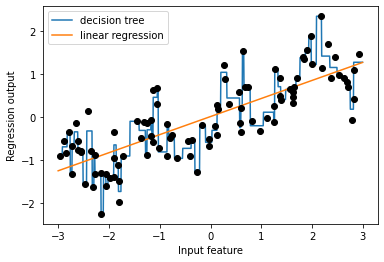

In [8]:
import mglearn
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
 
X, y = mglearn.datasets.make_wave(n_samples=100) 
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) 
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y) 
plt.plot(line, reg.predict(line), label="decision tree") 
 
reg = LinearRegression().fit(X, y) 
plt.plot(line, reg.predict(line), label="linear regression") 
 
plt.plot(X[:, 0], y, 'o', c='k') 
plt.ylabel("Regression output") 
plt.xlabel("Input feature") 
plt.legend(loc="best")

正如你所知，线性模型只能对线性关系建模，对于单个特征的情况就是直线。决策树可以
构建更为复杂的数据模型，但这强烈依赖于数据表示。有一种方法可以让线性模型在连续
数据上变得更加强大，就是使用特征<span class="mark">分箱</span>（binning，也叫离散化，即 discretization）将其
划分为多个特征，如下所述。

In [9]:
bins = np.linspace(-3, 3, 11) 
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [10]:
which_bin = np.digitize(X, bins=bins) 
print("\nData points:\n", X[:5]) 
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [11]:
from sklearn.preprocessing import OneHotEncoder 
# 使用OneHotEncoder进行变换 
encoder = OneHotEncoder(sparse=False) 
# encoder.fit找到which_bin中的唯一值 
encoder.fit(which_bin) 
# transform创建one-hot编码 
X_binned = encoder.transform(which_bin) 
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Text(0.5, 0, 'Input feature')

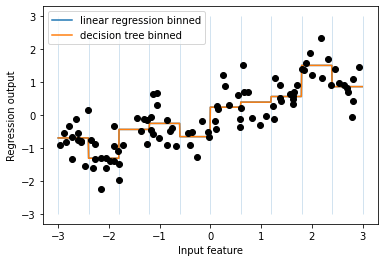

In [13]:
line_binned = encoder.transform(np.digitize(line, bins=bins)) 
 
reg = LinearRegression().fit(X_binned, y) 
plt.plot(line, reg.predict(line_binned), label='linear regression binned') 
 
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y) 
plt.plot(line, reg.predict(line_binned), label='decision tree binned') 
plt.plot(X[:, 0], y, 'o', c='k') 
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2) 
plt.legend(loc="best") 
plt.ylabel("Regression output") 
plt.xlabel("Input feature")

## 4.3　交互特征与多项式特征

想要丰富特征表示，特别是对于线性模型而言，另一种方法是添加原始数据的交互特征
（interaction feature）和多项式特征（polynomial feature）。这种特征工程通常用于统计建模，
但也常用于许多实际的机器学习应用中。

In [14]:
X_combined = np.hstack([X, X_binned]) 
print(X_combined.shape)

(100, 11)


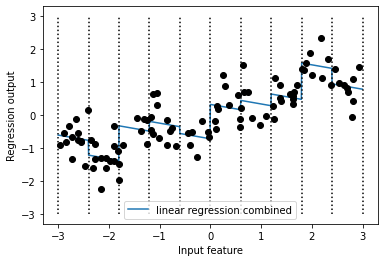

In [15]:
reg = LinearRegression().fit(X_combined, y) 
 
line_combined = np.hstack([line, line_binned]) 
plt.plot(line, reg.predict(line_combined), label='linear regression combined') 
 
for bin in bins: 
    plt.plot([bin, bin], [-3, 3], ':', c='k') 
 
plt.legend(loc="best") 
plt.ylabel("Regression output") 
plt.xlabel("Input feature") 
plt.plot(X[:, 0], y, 'o', c='k')

In [16]:
X_product = np.hstack([X_binned, X * X_binned]) 
print(X_product.shape)

(100, 20)


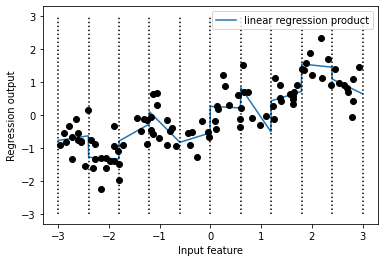

In [17]:
reg = LinearRegression().fit(X_product, y) 
 
line_product = np.hstack([line_binned, line * line_binned]) 
plt.plot(line, reg.predict(line_product), label='linear regression product') 
 
for bin in bins: 
    plt.plot([bin, bin], [-3, 3], ':', c='k') 
 
plt.plot(X[:, 0], y, 'o', c='k') 
plt.ylabel("Regression output") 
plt.xlabel("Input feature") 
plt.legend(loc="best")

使 用 分 箱 是 扩 展 连 续 特 征 的 一 种 方 法。 另 一 种 方 法 是 使 用 原 始 特 征 的 多 项 式
（polynomial）。对于给定特征 x，我们可以考虑 x  **  2、x  **  3、x  **  4，等等。这在
preprocessing 模块的 PolynomialFeatures 中实现：

In [18]:
from sklearn.preprocessing import PolynomialFeatures 
 
# 包含直到x ** 10的多项式: 
# 默认的"include_bias=True"添加恒等于1的常数特征 
poly = PolynomialFeatures(degree=10, include_bias=False) 
poly.fit(X) 
X_poly = poly.transform(X)

In [19]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [20]:
print("Entries of X:\n{}".format(X[:5])) 
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [21]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


C:\Program Files\Python39\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


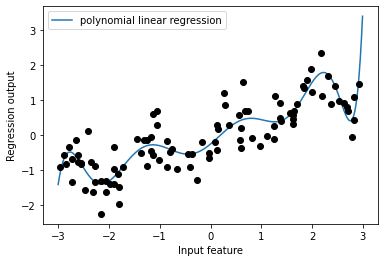

In [22]:
reg = LinearRegression().fit(X_poly, y) 
line_poly = poly.transform(line) 
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression') 
plt.plot(X[:, 0], y, 'o', c='k') 
plt.ylabel("Regression output") 
plt.xlabel("Input feature") 
plt.legend(loc="best")

## 4.4　单变量非线性变换

## 4.5　自动化特征选择

在添加新特征或处理一般的高维数据集时，最好将特征的数量减少到只包含最有用的那些特
征，并删除其余特征。这样会得到泛化能力更好、更简单的模型。但你如何判断每个特征
的作用有多大呢？有三种基本的策略：<span class="mark">单变量统计</span>（univariate statistics）、<span class="mark">基于模型的选择</span>
（model-based selection）和<span class="mark">迭代选择</span>（iterative selection）。

### 4.5.1　单变量统计

在单变量统计中，我们计算每个特征和目标值之间的关系是否存在统计显著性，然后选
择具有最高置信度的特征。对于分类问题，这也被称为方差分析（analysis of variance，
ANOVA）。这些测试的一个关键性质就是它们是单变量的（univariate），即它们只单独考
虑每个特征。因此，如果一个特征只有在与另一个特征合并时才具有信息量，那么这个特
征将被舍弃。单变量测试的计算速度通常很快，并且不需要构建模型。另一方面，它们完
全独立于你可能想要在特征选择之后应用的模型。

想要在 scikit-learn 中使用单变量特征选择，你需要选择一项测试——对分类问题通常
是 f_classif（默认值），对回归问题通常是 f_regression——然后基于测试中确定的 p 值
来选择一种舍弃特征的方法。

所有舍弃参数的方法都使用阈值来舍弃所有 p 值过大的特征
（意味着它们不可能与目标值相关）。计算阈值的方法各有不同，最简单的是 SelectKBest
和 SelectPercentile，前者选择固定数量的 k 个特征，后者选择固定百分比的特征。

In [23]:
from sklearn.datasets import load_breast_cancer 
from sklearn.feature_selection import SelectPercentile 
from sklearn.model_selection import train_test_split 
cancer = load_breast_cancer() 
# 获得确定性的随机数 
rng = np.random.RandomState(42) 
noise = rng.normal(size=(len(cancer.data), 50)) 
# 向数据中添加噪声特征 
# 前30个特征来自数据集，后50个是噪声 
X_w_noise = np.hstack([cancer.data, noise]) 
 
X_train, X_test, y_train, y_test = train_test_split( 
    X_w_noise, cancer.target, random_state=0, test_size=.5) 
# 使用f_classif（默认值）和SelectPercentile来选择50%的特征 
select = SelectPercentile(percentile=50) 
select.fit(X_train, y_train) 
# 对训练集进行变换 
X_train_selected = select.transform(X_train) 
 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

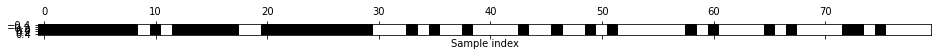

In [24]:
mask = select.get_support() 
print(mask) 
# 将遮罩可视化——黑色为True，白色为False 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")

In [31]:
from sklearn.linear_model import LogisticRegression 
 
# 对测试数据进行变换 
X_test_selected = select.transform(X_test) 
 
lr = LogisticRegression(solver='lbfgs', max_iter=5000) 
lr.fit(X_train, y_train) 
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test))) 
lr.fit(X_train_selected, y_train) 
print("Score with only selected features: {:.3f}".format( 
    lr.score(X_test_selected, y_test)))

Score with all features: 0.951
Score with only selected features: 0.933


### 4.5.2　基于模型的特征选择

基于模型的特征选择使用一个监督机器学习模型来判断每个特征的重要性，并且仅保留最
重要的特征。***用于特征选择的监督模型不需要与用于最终监督建模的模型相同。***特征选择
模型需要为每个特征提供某种重要性度量，以便用这个度量对特征进行排序。决策树和基
于决策树的模型提供了 feature_importances_ 属性，可以直接编码每个特征的重要性。

In [32]:
# 我们用包含 100 棵树的随机森林分类器来计算特征重要性。
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier 
select = SelectFromModel( 
    RandomForestClassifier(n_estimators=100, random_state=42), 
    threshold="median")

In [33]:
# 我们来实际拟合模型：
select.fit(X_train, y_train) 
X_train_l1 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

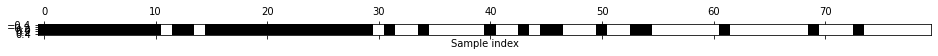

In [34]:
mask = select.get_support() 
# 将遮罩可视化——黑色为True，白色为False 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")

In [36]:
X_test_l1 = select.transform(X_test) 
score = LogisticRegression(solver='lbfgs', max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test) 
print("Test score: {:.3f}".format(score))

Test score: 0.947


### 4.5.3　迭代特征选择

在迭代特征选择中，将会构建一系列模型，每个模型都使用不同数量的特征。有
两种基本方法：开始时没有特征，然后逐个添加特征，直到满足某个终止条件；或者从所
有特征开始，然后逐个删除特征，直到满足某个终止条件。由于构建了一系列模型，所
以这些方法的计算成本要比前面讨论过的方法更高。其中一种特殊方法是递归特征消除
（recursive feature elimination，RFE），它从所有特征开始构建模型，并根据模型舍弃最不重
要的特征，然后使用除被舍弃特征之外的所有特征来构建一个新模型，如此继续，直到仅
剩下预设数量的特征。

为了让这种方法能够运行，用于选择的模型需要提供某种确定特征
重要性的方法，正如基于模型的选择所做的那样。下面我们使用之前用过的同一个随机森
林模型:

Text(0.5, 0, 'Sample index')

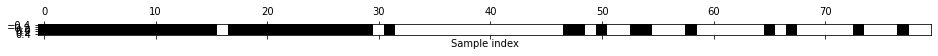

In [38]:
from sklearn.feature_selection import RFE 
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), 
             n_features_to_select=40) 
select.fit(X_train, y_train) 
# 将选中的特征可视化： 
mask = select.get_support() 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")

与单变量选择和基于模型的选择相比，迭代特征选择的结果更好，但仍然漏掉了一个特
征。运行上述代码需要的时间也比基于模型的选择长得多，因为对一个随机森林模型训练
了 40 次，每运行一次删除一个特征。我们来测试一下使用 RFE 做特征选择时 Logistic 回
归模型的精度：

In [40]:
X_train_rfe= select.transform(X_train) 
X_test_rfe= select.transform(X_test) 
 
score = LogisticRegression(solver='lbfgs', max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test) 
print("Test score: {:.3f}".format(score))

Test score: 0.940


## 4.6　利用专家知识